In [ ]:
# Sequential API : 여러 층 설계, 복잡한 모델을 작성하기에는 한계가 있음
# 

In [42]:
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras import optimizers

In [ ]:
# 입력 데이터 차원이 1 가정, 신경망 함수형 API로 설계 

In [4]:
inputs=Input(shape=(10,)) # 10개 입력을 받는 입력 계층, 입력의 크기를 정의
h1=Dense(64, activation='relu')(inputs) # 이전층을 다음층의 입력으로 사용
h2=Dense(64, activation='relu')(h1)
outputs=Dense(1, activation='sigmoid')(h2)

In [5]:
model=Model(inputs=inputs, outputs=outputs) # 입력과 출력 정의

In [6]:
model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#model.fit(data, label)

In [ ]:
# 공부시간에 따른 시험점수 예측 모델 
# 1)Sequential 이용 모델 설계
# 2)함수형 api 이용 모델 설계

In [22]:
x=[1,2,3,4,5,6,7,8,9] # 공부시간 (시간의 축 하나(1))
y=[15,20,32,43,59,60,68,81,95] # 점수
# 선형회귀모델 작성(공부시간 -> 점수예측) 

In [23]:
# 1) Sequential 이용
model=Sequential()
# 입력데이터(x)의 차원 : 1, 출력(y)의 차원 : 1, 활성화함수:선형회귀 이므로 linear
model.add(Dense(1 ,input_dim=1, activation='linear')) # units= 출력을 몇개로 할거냐

In [24]:
# 경사하강법
sgd = optimizers.SGD(lr=0.01) # lr = learning rate

In [25]:
# cost함수 
model.compile(loss = 'mse', optimizer = 'sgd', metrics=['mse'])

In [26]:
model.fit(x,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 324ms/step - loss: 4079.9856 - mse: 4079.9856
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 511.0914 - mse: 511.0914
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 71.9625 - mse: 71.9625
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 17.9278 - mse: 17.9278
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 11.2761 - mse: 11.2761
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 10.4545 - mse: 10.4545
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 10.3503 - mse: 10.3503
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 10.3344 - mse: 10.3344
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 10.3294 - mse: 10.3294
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 10.3257 - mse: 10.3257
Epoch 11/500
1/1 [==============================] 

In [17]:
import matplotlib.pyplot as plt

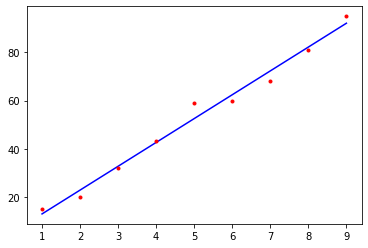

In [27]:
plt.plot(x, model.predict(x), 'b', x, y, 'r.')

In [30]:
model.predict([5.5])[0][0] # 5.5시간 공부하면 57점 예상

57.465336

In [31]:
# 2. 함수형 api로 모델 설계

In [32]:
x=[1,2,3,4,5,6,7,8,9] #공부시간
y=[15,20,32,43,59,60,68,81,95] #점수


In [33]:
inputs=Input(shape=(1,)) # 1개 입력을 받는 입력 계층, 입력의 크기를 정의
output=Dense(1, activation='linear')(inputs) # 이전층을 다음층의 입력으로 사용
model=Model(inputs=inputs, outputs=output)

In [34]:
# 경사하강법
sgd = optimizers.SGD(lr=0.01) # lr = learning rate

# cost함수 
model.compile(loss = 'mse', optimizer = 'sgd', metrics=['mse'])

model.fit(x,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 310ms/step - loss: 2550.9290 - mse: 2550.9290
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 323.1749 - mse: 323.1749
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 49.0616 - mse: 49.0616
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 15.3290 - mse: 15.3290
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 11.1735 - mse: 11.1735
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 10.6573 - mse: 10.6573
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 10.5889 - mse: 10.5889
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 10.5756 - mse: 10.5756
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 10.5692 - mse: 10.5692
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 10.5637 - mse: 10.5637
Epoch 11/500
1/1 [==============================] 

In [35]:
model.predict([5.5])[0][0]

57.459396

In [37]:
import numpy as np

In [39]:
# 단층, 단방향, 다:다

In [45]:
from tensorflow.keras.layers import TimeDistributed

In [46]:
x=np.array([[[1,], [2,], [3,], [4,]]])
x=np.array([[[2,], [3,], [4,], [5,]]])

![image](https://user-images.githubusercontent.com/78655692/141218340-5e57e3c8-f4ea-4a6c-bee2-4021267ecc62.png)

![image](https://user-images.githubusercontent.com/78655692/141220680-1a9f2a46-25c4-4dea-beaa-5c9d933072c8.png)


In [47]:
xin=Input(batch_shape=(None, 4, 1)) #입력계층 설계 (데이터개수, 타임스텝, 각각의 차원)
lstm=LSTM(3, return_sequences=True)(xin) #히든계층 설계 (LSTM출력 개수)
# xout=Dense(1)(lstm) #출력계층 설계
xout=TimeDistributed(Dense(1))(lstm)

In [48]:
model=Model(xin, xout)

In [49]:
# sgd=optimizers.SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x,y, epochs=500)

Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 25.9248 - mse: 25.9248
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 25.8785 - mse: 25.8785
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 25.8320 - mse: 25.8320
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 25.7854 - mse: 25.7854
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 25.7388 - mse: 25.7388
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 25.6920 - mse: 25.6920
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 25.6452 - mse: 25.6452
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 25.5982 - mse: 25.5982
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 25.5512 - mse: 25.5512
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 25.5041 - mse: 25.5041
Epoch 11/500
1/1 [==============================] - 0

In [50]:
import pandas as pd

In [54]:
df=pd.read_csv('f:/data/bitcoin.csv')
df

# pd.DataFrame(df['Close'])
df_close = df[['Close']]

In [56]:
df_close=df[['Date']]

In [59]:
df_close.index = pd.to_datetime(df['Date']) 

In [61]:
df_close.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
               '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15'],
              dtype='datetime64[ns]', name='Date', length=1049, freq=None)

In [62]:
df_close.describe()

,Close
count,1049.000000
mean,6276.268179
std,3601.456029
min,777.760000
25%,3631.040000
50%,6377.780000
75%,8586.470000
max,19497.400000


Text(0.5, 1.0, 'Bitcoin Closing Price')

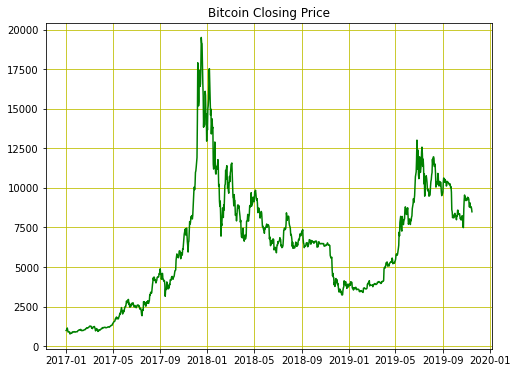

In [65]:
plt.figure(figsize=(8,6))
plt.plot(df_close, color='g')
plt.grid(color='y')
plt.title("Bitcoin Closing Price")

In [77]:
list_of_attributes=['Close']
list_of_prev_t_instants=[]
for i in range(1,16):
    list_of_prev_t_instants.append(i)

In [78]:
list_of_prev_t_instants

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [79]:
df_close

,Close
Date,
2017-01-01,998.33
2017-01-02,1021.75
2017-01-03,1043.84
2017-01-04,1154.73
2017-01-05,1013.38
...,...
2019-11-11,8757.79
2019-11-12,8815.66
2019-11-13,8808.26


In [80]:
def create_ra(df, attribute, list_of_prev_t_instants):
    #구현
    list_of_prev_t_instants.sort()
    start=list_of_prev_t_instants[-1] #15일차를 시작으로
    end=len(df) #1049일차를 마지막으로 설정
    df['datetime']=df.index #'2017-01-01' ~ '2019-11-15'
    df.reset_index(drop=True)
    
    df_copy=df[start:end]
    df_copy.reset_index(inplace=True, drop=True)
    print(df_copy)

    for attribute in attribute:
        fb=pd.DataFrame()
        for prev_t in list_of_prev_t_instants:
            new_col=pd.DataFrame(df[attribute].iloc[(start-prev_t) : (end-prev_t)])
            new_col.reset_index(drop=True, inplace=True)
            new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)


    
    # return df_copy

In [ ]:
df_new=create_ra(df_close, list_of_attributes, list_of_prev_t_instants)
df_new
df_new.shape #(1034, 16)

<ipython-input-133-6cccc168db4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime']=df.index #'2017-01-01' ~ '2019-11-15'


(1034, 16)

In [ ]:
df_new

,Close,Close_(t-1),Close_(t-2),Close_(t-3),Close_(t-4),Close_(t-5),Close_(t-6),Close_(t-7),Close_(t-8),Close_(t-9),Close_(t-10),Close_(t-11),Close_(t-12),Close_(t-13),Close_(t-14),Close_(t-15)
datetime,,,,,,,,,,,,,,,,
2017-01-16,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73,1043.84,1021.75,998.33
2017-01-17,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73,1043.84,1021.75
2017-01-18,886.62,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73,1043.84
2017-01-19,899.07,886.62,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73
2017-01-20,895.03,899.07,886.62,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,8757.79,9055.53,8813.58,8804.88,9267.56,9360.88,9342.53,9412.61,9235.35,9324.72,9261.10,9199.58,9205.73,9427.69,9256.15,9551.71
2019-11-12,8815.66,8757.79,9055.53,8813.58,8804.88,9267.56,9360.88,9342.53,9412.61,9235.35,9324.72,9261.10,9199.58,9205.73,9427.69,9256.15
2019-11-13,8808.26,8815.66,8757.79,9055.53,8813.58,8804.88,9267.56,9360.88,9342.53,9412.61,9235.35,9324.72,9261.10,9199.58,9205.73,9427.69


In [ ]:
#모델 설계(입력 : 15개)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
input_layer=Input(shape=(15), dtype='float32')
hidden1=Dense(60, activation='linear')(input_layer)
hidden2=Dense(60, activation='linear')(hidden1)
drop_layer=Dropout(0.2)(hidden2)
output_layer=Dense(1, activation='linear') (drop_layer)

In [ ]:
model=Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(x=df_new.iloc[:, 1:], y=df_new.iloc[:,0], batch_size=5, epochs=50)

Epoch 1/50
207/207 [==============================] - 1s 986us/step - loss: 6142438.0000
Epoch 2/50
207/207 [==============================] - 0s 927us/step - loss: 1420910.3750
Epoch 3/50
207/207 [==============================] - 0s 1ms/step - loss: 1268500.0000
Epoch 4/50
207/207 [==============================] - 0s 1ms/step - loss: 780841.8750
Epoch 5/50
207/207 [==============================] - 0s 1ms/step - loss: 1255347.0000
Epoch 6/50
207/207 [==============================] - 0s 981us/step - loss: 854337.5625
Epoch 7/50
207/207 [==============================] - 0s 1ms/step - loss: 687541.6250
Epoch 8/50
207/207 [==============================] - 0s 956us/step - loss: 576979.5625
Epoch 9/50
207/207 [==============================] - 0s 944us/step - loss: 690276.8125
Epoch 10/50
207/207 [==============================] - 0s 1ms/step - loss: 740981.0000
Epoch 11/50
207/207 [==============================] - 0s 1ms/step - loss: 741405.5000
Epoch 12/50
207/207 [=================

In [ ]:
xtrain, ytrain = df_train.iloc[:, 1:], df_train.iloc[:,0] # (744, 15)

In [ ]:
xtest, ytest = df_test.iloc[:,1:], df_test.iloc[:,0] # (207, 15) 

In [ ]:
xvalid, yvalid = df_valid.iloc[:,1:], df_valid.iloc[:,0] # (83, 15)

In [ ]:
xvalid.shape